<a href="https://colab.research.google.com/github/skarthi369/vehicle-insurance-/blob/main/insurance_with_vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading the libraries

In [12]:
import pandas as pd # data analytical library
import matplotlib.pyplot as plt #visualization
import seaborn as sns #statistical visualization

In [13]:

# Upload the training dataset
#uploaded = files.upload()
#train_file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Upload the testing dataset
#uploaded = files.upload()
#test_file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Read the datasets into pandas DataFrames
#df = pd.read_csv(train_file_name)  # train dataset
#df1 = pd.read_csv(test_file_name)  # test dataset

# Now you can work with the 'df' and 'df1' DataFrames

### Reading the test and train dataset

In [14]:
df=pd.read_csv("/content/train (1).csv")  #train dataset
df1=pd.read_csv("/content/Test (1).csv") #test dataset

In [15]:
#Checking the dataframe for training data
df.head()

,Unnamed: 0,Unnamed: 1,DateReported,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,DependentsOther,Unnamed: 8,Unnamed: 9,Unnamed: 10,DaysWorkedPerWeek,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,ClaimNumber,DateTimeOfAccident,NaN,Age,Gender,MaritalStatus,DependentChildren,NaN,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,NaN,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717


#### Renaming the column names in train data as it is "unnamed"

In [16]:
df=df.rename(columns={"Unnamed: 0":"ClaimNumber","Unnamed: 1":"DateTimeOfAccident","Unnamed: 3":"Age","Unnamed: 4":"Gender",
                      "Unnamed: 5":"MaritalStatus","Unnamed: 6":"DependentChildren","Unnamed: 8":"WeeklyWages",
                      "Unnamed: 9":"PartTimeFullTime","Unnamed: 10":"HoursWorkedPerWeek","Unnamed: 12":"ClaimDescription",
                      "Unnamed: 13":"InitialIncurredCalimsCost","Unnamed: 14":'UltimateIncurredClaimCost'},inplace=False)

#### Dropping the first row as it has the column names in train data

In [17]:
df=df.drop(df.index[0])
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717
5,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0.0,377.1,F,38,5.0,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


### Data Frame Summary

In [18]:
#for training data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 1 to 36176
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   DateReported               36176 non-null  object 
 3   Age                        36176 non-null  object 
 4   Gender                     36176 non-null  object 
 5   MaritalStatus              36154 non-null  object 
 6   DependentChildren          36176 non-null  object 
 7   DependentsOther            36176 non-null  float64
 8   WeeklyWages                36120 non-null  object 
 9   PartTimeFullTime           36176 non-null  object 
 10  HoursWorkedPerWeek         36127 non-null  object 
 11  DaysWorkedPerWeek          36176 non-null  float64
 12  ClaimDescription           36176 non-null  object 
 13  InitialIncurredCalimsCost  36176 non-null  obj

In [19]:
#test data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                17824 non-null  object 
 1   DateTimeOfAccident         17824 non-null  object 
 2   DateReported               17824 non-null  object 
 3   Age                        17824 non-null  int64  
 4   Gender                     17824 non-null  object 
 5   MaritalStatus              17817 non-null  object 
 6   DependentChildren          17824 non-null  int64  
 7   DependentsOther            17824 non-null  int64  
 8   WeeklyWages                17824 non-null  float64
 9   PartTimeFullTime           17824 non-null  object 
 10  HoursWorkedPerWeek         17824 non-null  float64
 11  DaysWorkedPerWeek          17824 non-null  int64  
 12  ClaimDescription           17824 non-null  object 
 13  InitialIncurredCalimsCost  17824 non-null  int

In [20]:
#Checking for Categorical Data in train data
df.select_dtypes(exclude=['int64','float64']).columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'WeeklyWages', 'PartTimeFullTime',
       'HoursWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')

##### Changing the data type for some columns in train data

In [21]:
df['Age'] = pd.to_numeric(df['Age'])
df['DependentChildren'] = pd.to_numeric(df['DependentChildren'])
df['DependentsOther'] = pd.to_numeric(df['DependentsOther'])
df['WeeklyWages'] = pd.to_numeric(df['WeeklyWages'])
df['HoursWorkedPerWeek'] = pd.to_numeric(df['HoursWorkedPerWeek'])
df['DaysWorkedPerWeek'] = pd.to_numeric(df['DaysWorkedPerWeek'])
df['InitialIncurredCalimsCost'] = pd.to_numeric(df['InitialIncurredCalimsCost'])
df['UltimateIncurredClaimCost'] = pd.to_numeric(df['UltimateIncurredClaimCost'])

##### To check if the data type changed or not

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 1 to 36176
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   DateReported               36176 non-null  object 
 3   Age                        36176 non-null  int64  
 4   Gender                     36176 non-null  object 
 5   MaritalStatus              36154 non-null  object 
 6   DependentChildren          36176 non-null  int64  
 7   DependentsOther            36176 non-null  float64
 8   WeeklyWages                36120 non-null  float64
 9   PartTimeFullTime           36176 non-null  object 
 10  HoursWorkedPerWeek         36127 non-null  float64
 11  DaysWorkedPerWeek          36176 non-null  float64
 12  ClaimDescription           36176 non-null  object 
 13  InitialIncurredCalimsCost  36176 non-null  int

In [23]:
 #checking the description of train data
df.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,36176.000000,36176.000000,36176.000000,36120.000000,36127.000000,36176.000000,36176.000000,3.617600e+04
mean,33.795196,0.121296,0.009537,416.471426,37.766820,4.905794,7743.593874,1.095282e+04
std,12.114729,0.525395,0.106163,243.875364,12.494323,0.547077,18223.698531,3.529614e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,700.000000,9.257424e+02
50%,32.000000,0.000000,0.000000,393.365000,38.000000,5.000000,2000.000000,3.373862e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9500.000000,8.186852e+03
max,79.000000,9.000000,3.000000,7497.000000,640.000000,7.000000,830000.000000,4.027136e+06


##### Working on the train data

##### Checking the shape of dataset

In [24]:
df.shape

(36176, 15)

##### Checking for duplicate values

In [25]:
df.duplicated().sum()

0

##### Checking for missing values

In [26]:
df.isnull().sum()

,0
ClaimNumber,0
DateTimeOfAccident,0
DateReported,0
Age,0
Gender,0
MaritalStatus,22
DependentChildren,0
DependentsOther,0
WeeklyWages,56
PartTimeFullTime,0


##### Using mean and mode imputation to treating the missing values

In [27]:
df['WeeklyWages']=df['WeeklyWages'].fillna(df['WeeklyWages'].mean())
df['HoursWorkedPerWeek']=df['HoursWorkedPerWeek'].fillna(df['HoursWorkedPerWeek'].mean())
df['MaritalStatus']=df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])

In [28]:
#To verify if there are any more missing values
df.isnull().sum()

,0
ClaimNumber,0
DateTimeOfAccident,0
DateReported,0
Age,0
Gender,0
MaritalStatus,0
DependentChildren,0
DependentsOther,0
WeeklyWages,0
PartTimeFullTime,0


##### Now there are no missing values

##### Dividing the data into categorical and numerical data

In [31]:
df_num=df[['Age','DependentChildren', 'DependentsOther', 'WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
           'InitialIncurredCalimsCost','UltimateIncurredClaimCost']] # Changed {} to []
df_cat=df[['ClaimNumber', 'DateTimeOfAccident', 'DateReported','Gender' ,'MaritalStatus','PartTimeFullTime','ClaimDescription']] # Changed {} to []

##### For understanding categorical data


In [32]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
S,17472
M,15162
U,3542


In [33]:
df['Gender'].value_counts()

,count
Gender,
M,27919
F,8256
U,1


In [34]:
df['PartTimeFullTime'].value_counts()

,count
PartTimeFullTime,
F,32917
P,3259


In [35]:
df['ClaimDescription'].nunique()

20596

##### There are 20596 unique claims made.

In [36]:
df.ClaimNumber.count()

36176

##### The total number of claims filed is 36176.

In [37]:
df['ClaimNumber'].nunique()

29456

##### The total number of claims that were filed is 36176 but number of unique claims are 29456.

### Data Transformation

#### Data  binning

In [38]:
df['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 1        48
2        43
3        30
4        41
5        36
         ..
36172    20
36173    35
36174    52
36175    28
36176    29
Name: Age, Length: 36176, dtype: int64>

In [39]:
df['Age'].min()

13

In [40]:
df['Age'].max()

79

In [41]:
df['Age_Bin']=pd.cut(df['Age'],bins=[1,25,50,80] , labels=['Young','Middle-Age','Old'])
df['Age_Bin']

,Age_Bin
1,Middle-Age
2,Middle-Age
3,Middle-Age
4,Middle-Age
5,Middle-Age
...,...
36172,Young
36173,Middle-Age
36174,Old
36175,Middle-Age


In [42]:
df['WeeklyWages'].value_counts

<bound method IndexOpsMixin.value_counts of 1         500.00
2         509.34
3         709.10
4         555.46
5         377.10
          ...   
36172     344.16
36173    1668.83
36174     204.87
36175     730.87
36176     200.00
Name: WeeklyWages, Length: 36176, dtype: float64>

In [43]:
df['WeeklyWages'].max()

7497.0

In [44]:
df['WeeklyWages'].min()

1.0

In [45]:
df['WeeklyWages_Bin']=pd.cut(df['WeeklyWages'],bins=[0,1000,2000,4000,7000,8000] , labels=['Low','Below Average','Average Wage','Above Average','High'])
df['WeeklyWages_Bin']

,WeeklyWages_Bin
1,Low
2,Low
3,Low
4,Low
5,Low
...,...
36172,Low
36173,Below Average
36174,Low
36175,Low


 ## Exploratory Data Analysis : Univariate Analysis

In [46]:
#Checking the target variable
df['UltimateIncurredClaimCost'].describe()

,UltimateIncurredClaimCost
count,3.617600e+04
mean,1.095282e+04
std,3.529614e+04
min,1.218868e+02
25%,9.257424e+02
50%,3.373862e+03
75%,8.186852e+03
max,4.027136e+06


<ipython-input-47-c8eedd78bd96>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UltimateIncurredClaimCost'])


<Axes: xlabel='UltimateIncurredClaimCost', ylabel='Density'>

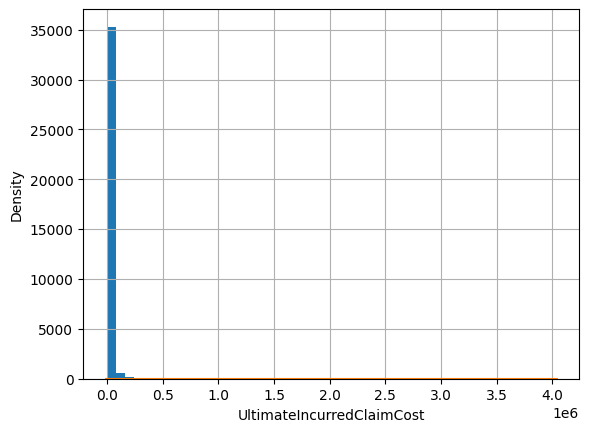

In [47]:
#Checking the skewness of the target variable
df['UltimateIncurredClaimCost'].hist(bins=50)
sns.distplot(df['UltimateIncurredClaimCost'])

##### The data for UltimateIncurredClaimCost is right skewed.

In [48]:
df['InitialIncurredCalimsCost'].describe()

,InitialIncurredCalimsCost
count,36176.000000
mean,7743.593874
std,18223.698531
min,1.000000
25%,700.000000
50%,2000.000000
75%,9500.000000
max,830000.000000


<ipython-input-49-9cf9e8d02160>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['InitialIncurredCalimsCost'])


<Axes: xlabel='InitialIncurredCalimsCost', ylabel='Density'>

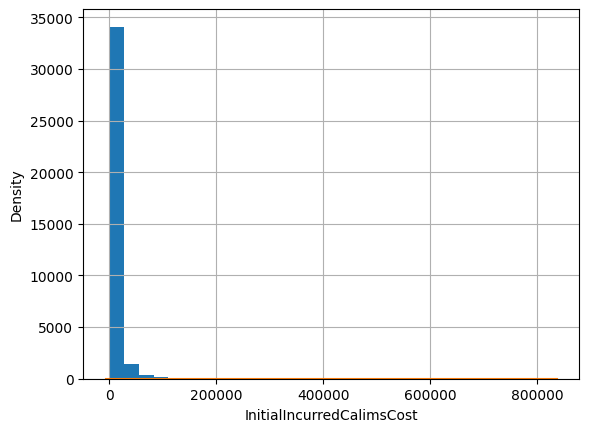

In [49]:
df['InitialIncurredCalimsCost'].hist(bins=30)
sns.distplot(df['InitialIncurredCalimsCost'])

##### The data for InitialIncurredClaimCost is right skewed.

<ipython-input-50-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

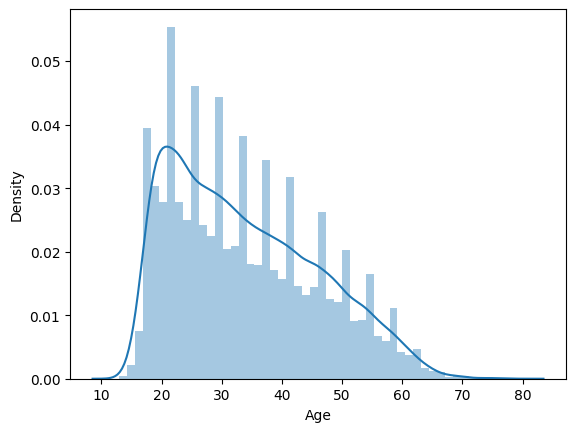

In [50]:
sns.distplot(df['Age'])

<Axes: xlabel='Age_Bin', ylabel='count'>

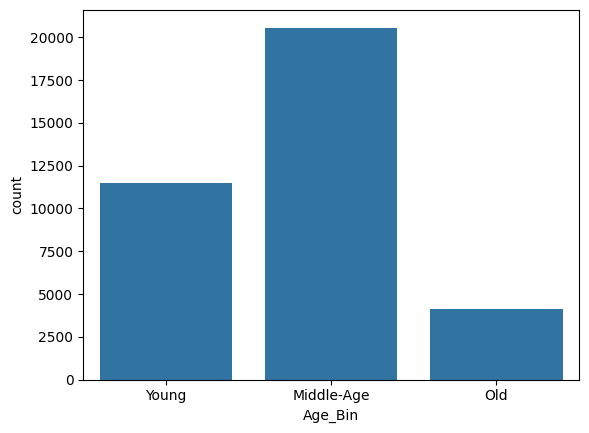

In [51]:
sns.countplot(x = 'Age_Bin', data = df)

In [52]:
df['Age_Bin'].value_counts(normalize=True)*100

,proportion
Age_Bin,
Middle-Age,56.844317
Young,31.750332
Old,11.405352


##### From both the plots we can see that the claims are higher from the middle age group (25-40) which is roughly 57%.

<Axes: xlabel='DependentChildren', ylabel='count'>

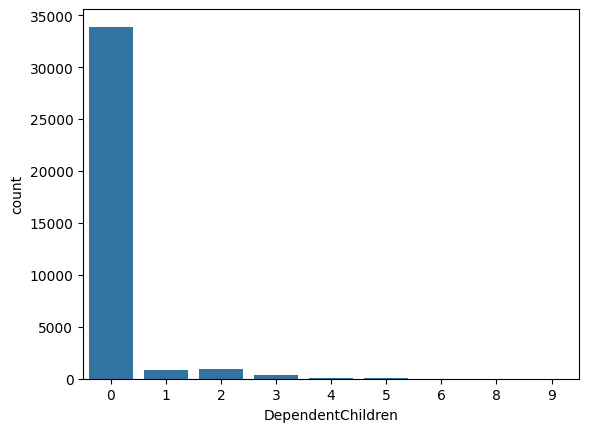

In [53]:
sns.countplot(x = 'DependentChildren', data = df)

In [54]:
df['DependentChildren'].value_counts(normalize=True)*100

,proportion
DependentChildren,
0,93.703008
2,2.554180
1,2.371738
3,0.975785
4,0.284719
5,0.093985
6,0.011057
9,0.002764
8,0.002764


##### The claims made from people with no children as dependents is high(Almost 94%).

<Axes: xlabel='DependentsOther', ylabel='count'>

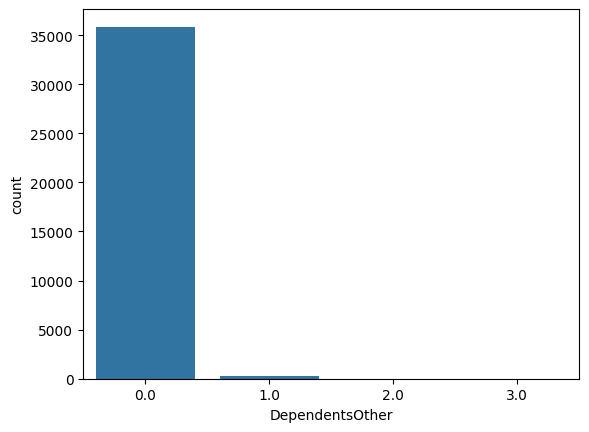

In [55]:
sns.countplot(x = 'DependentsOther', data = df)

In [56]:
df['DependentsOther'].value_counts(normalize=True)*100

,proportion
DependentsOther,
0.0,99.120964
1.0,0.820986
2.0,0.041464
3.0,0.016586


##### The claims made from people with no dependents is high (Almost 99%).

<ipython-input-57-43a8d470c2df>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HoursWorkedPerWeek'])


<Axes: xlabel='HoursWorkedPerWeek', ylabel='Density'>

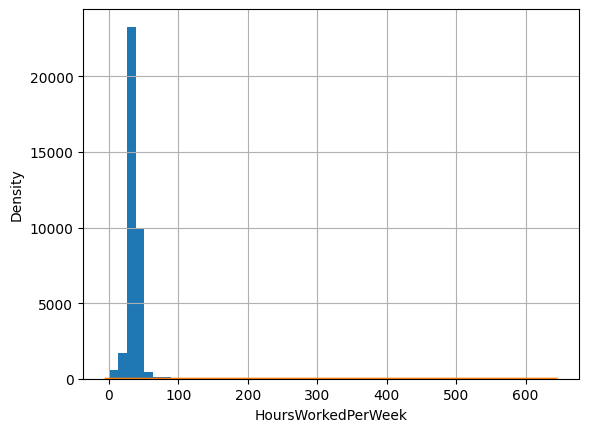

In [57]:
df['HoursWorkedPerWeek'].hist(bins=50)
sns.distplot(df['HoursWorkedPerWeek'])

##### The data for HoursWorkedPerWeek is positively skewed.

<Axes: xlabel='DaysWorkedPerWeek', ylabel='count'>

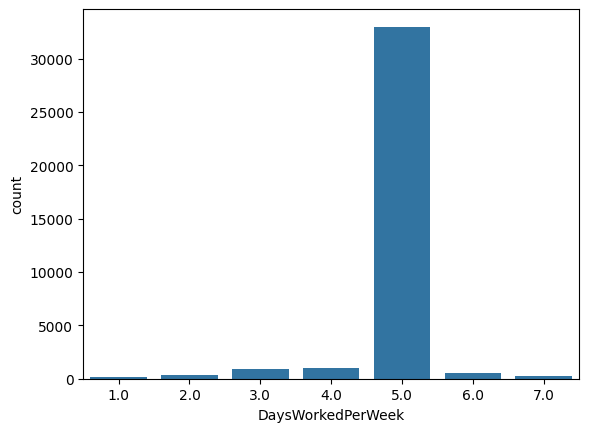

In [58]:
sns.countplot(x = 'DaysWorkedPerWeek', data = df)

In [59]:
df['DaysWorkedPerWeek'].value_counts(normalize=True)*100

,proportion
DaysWorkedPerWeek,
5.0,91.209642
4.0,2.750442
3.0,2.642636
6.0,1.561809
2.0,0.928793
7.0,0.577731
1.0,0.328947


##### From the above plot we can see that 91% of the people who have claimed for insurance work for 5 days a week.

<Axes: xlabel='Gender', ylabel='count'>

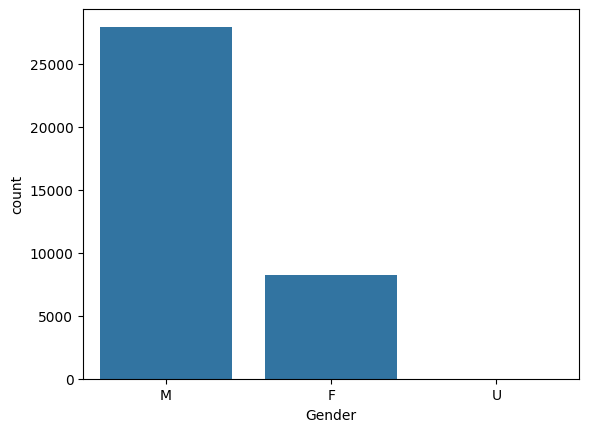

In [60]:
sns.countplot(x = 'Gender', data = df)

In [61]:
df['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
M,77.175475
F,22.821760
U,0.002764


##### From the above plot we can see approximately 77% people who claimed for insurance are males while 22% are females.

<Axes: xlabel='MaritalStatus', ylabel='count'>

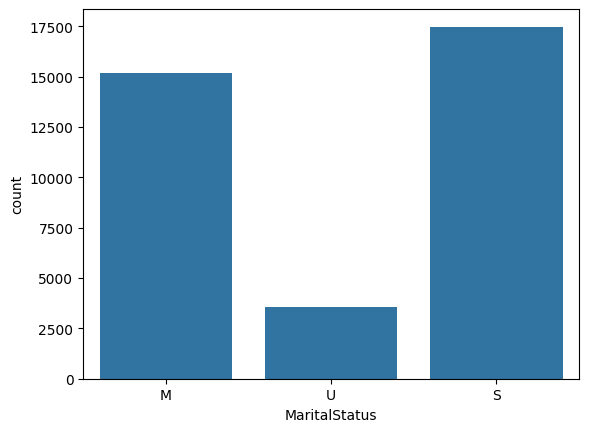

In [62]:
sns.countplot(x = 'MaritalStatus', data = df)

In [63]:
df['MaritalStatus'].value_counts(normalize=True)*100

,proportion
MaritalStatus,
S,48.297214
M,41.911765
U,9.791022


##### From the above plot we can see approximately 48% people who claimed for insurance are single while 41% are married and a very small percentage of people are unmarried.

<Axes: xlabel='PartTimeFullTime', ylabel='count'>

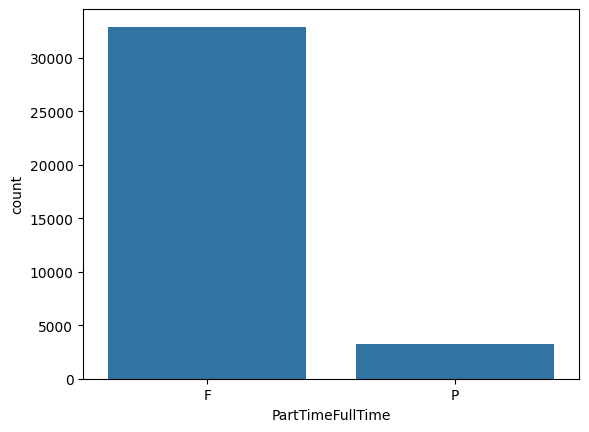

In [64]:
sns.countplot(x = 'PartTimeFullTime', data = df)

In [65]:
df['PartTimeFullTime'].value_counts(normalize=True)*100

,proportion
PartTimeFullTime,
F,90.991265
P,9.008735


##### From the above plot we can see approximately 91% of the people hold full time jobs.

<Axes: xlabel='WeeklyWages_Bin', ylabel='count'>

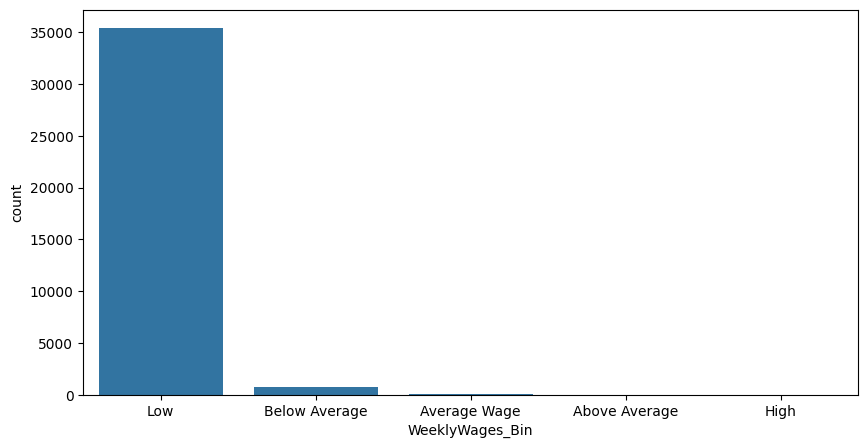

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'WeeklyWages_Bin', data = df)

In [67]:
df['WeeklyWages_Bin'].value_counts(normalize=True)*100

,proportion
WeeklyWages_Bin,
Low,97.910217
Below Average,1.973684
Average Wage,0.105042
Above Average,0.008293
High,0.002764


##### From the above plot we can see that most of the people who claimed for insurance have low wages

## Bivariate analysis

<Axes: xlabel='Age_Bin', ylabel='UltimateIncurredClaimCost'>

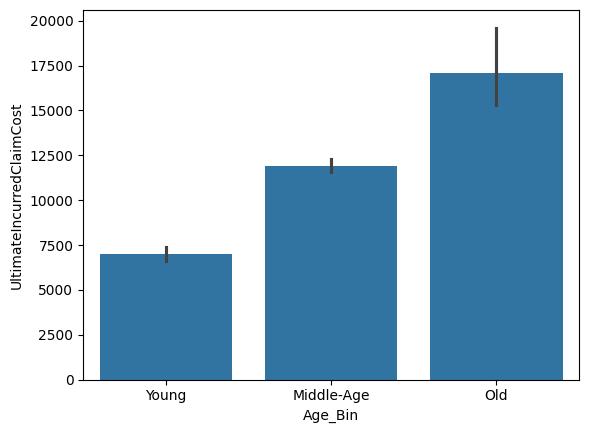

In [68]:
sns.barplot(x='Age_Bin',y='UltimateIncurredClaimCost',data=df)

##### People who are in the old age group (50-80) got more total claims payments by the insurance company.

<Axes: xlabel='DependentChildren', ylabel='UltimateIncurredClaimCost'>

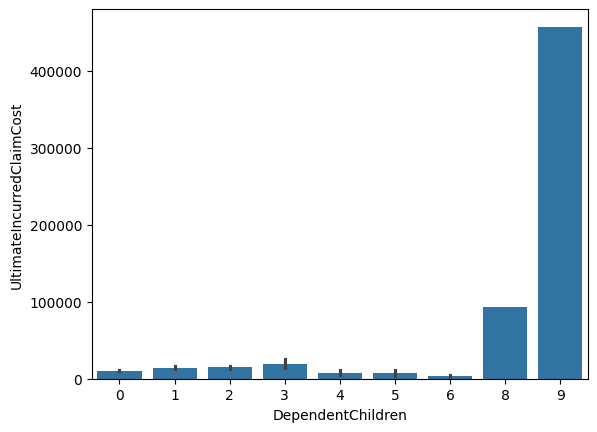

In [69]:
#plt.figure(figsize=(10,5))
sns.barplot(x='DependentChildren',y='UltimateIncurredClaimCost',data=df)
#plt.show()

##### People who have more children as dependents got more insurance payments from the insurance company.

<Axes: xlabel='DependentsOther', ylabel='UltimateIncurredClaimCost'>

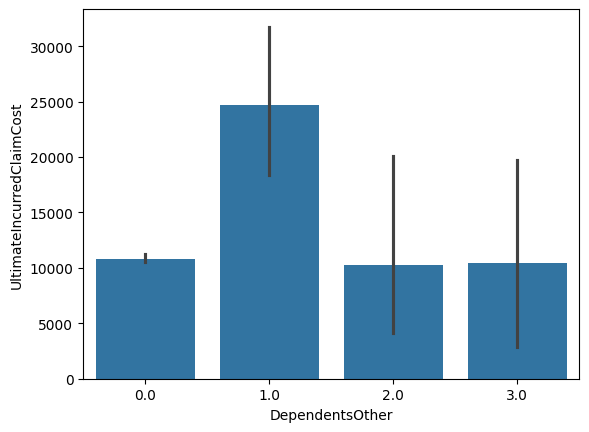

In [70]:
sns.barplot(x='DependentsOther',y='UltimateIncurredClaimCost',data=df)

<Axes: xlabel='WeeklyWages_Bin', ylabel='InitialIncurredCalimsCost'>

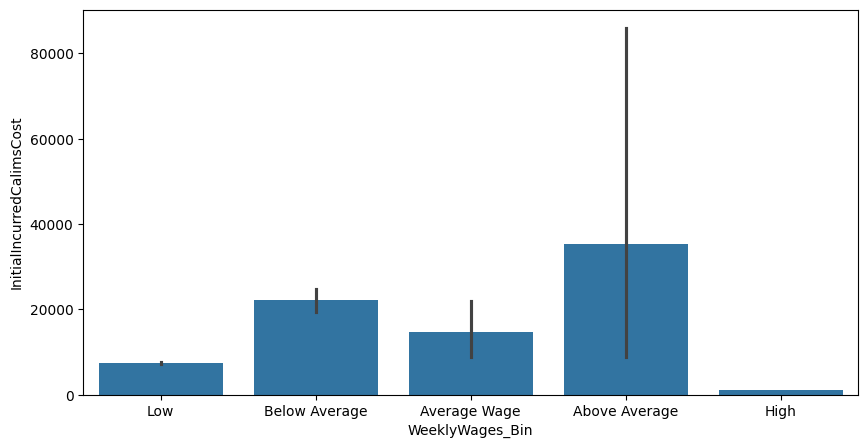

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(x='WeeklyWages_Bin',y='InitialIncurredCalimsCost',data=df)

##### People whose wages are above average claimed for more claim cost.

<Axes: xlabel='WeeklyWages_Bin', ylabel='UltimateIncurredClaimCost'>

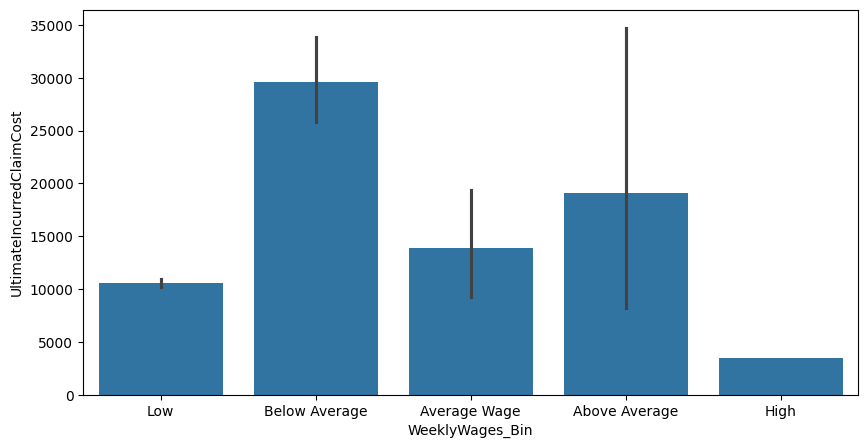

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(x='WeeklyWages_Bin',y='UltimateIncurredClaimCost',data=df)

##### People who's wages are below average and above average got more total claims payments by the insurance company.

<Axes: xlabel='DaysWorkedPerWeek', ylabel='UltimateIncurredClaimCost'>

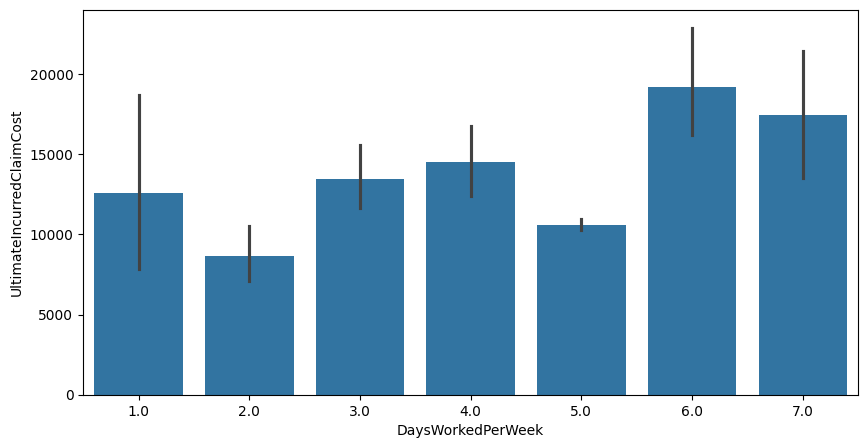

In [73]:
plt.figure(figsize=(10,5))
sns.barplot(x='DaysWorkedPerWeek',y='UltimateIncurredClaimCost',data=df)

In [74]:
df_drop=df.drop(columns=['WeeklyWages', 'WeeklyWages_Bin','HoursWorkedPerWeek','DaysWorkedPerWeek','Age_Bin'])
df_drop.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,PartTimeFullTime,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,F,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,F,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,F,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,F,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
5,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0.0,F,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


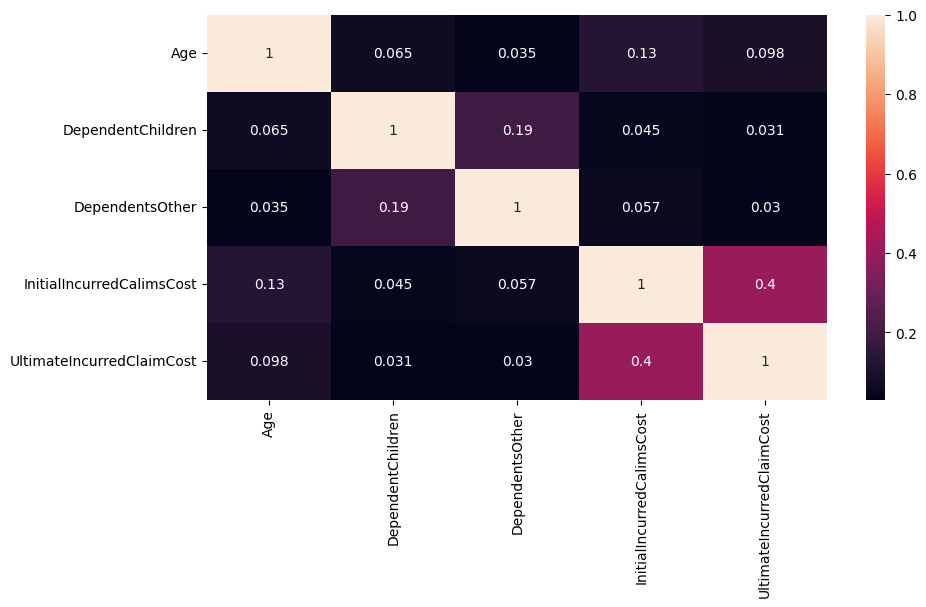

In [98]:
plt.figure(figsize=(10,5))
# Selecting only numerical features for correlation calculation
numerical_features = ['Age', 'DependentChildren', 'DependentsOther',
                      'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost']
sns.heatmap(df_drop[numerical_features].corr(), annot=True)
plt.show()

##### There is no correlation among the numerical columns.

<Axes: xlabel='UltimateIncurredClaimCost', ylabel='Age_Bin'>

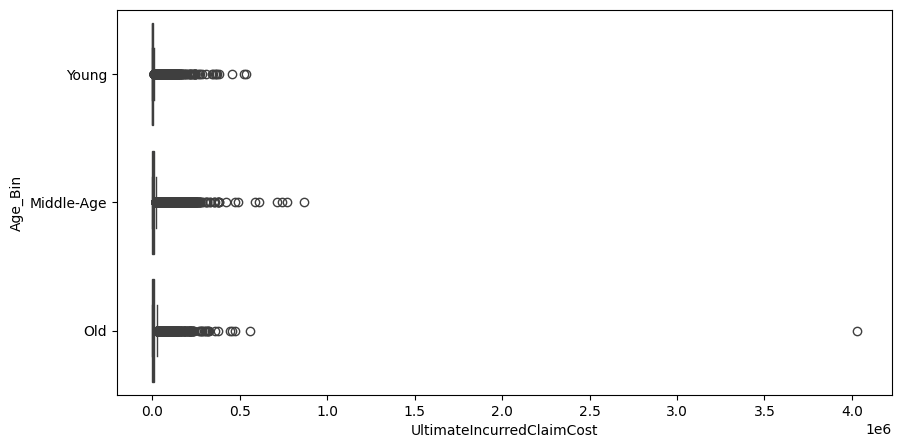

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(x='UltimateIncurredClaimCost', y='Age_Bin',data=df)

## Outlier Analysis

<Axes: >

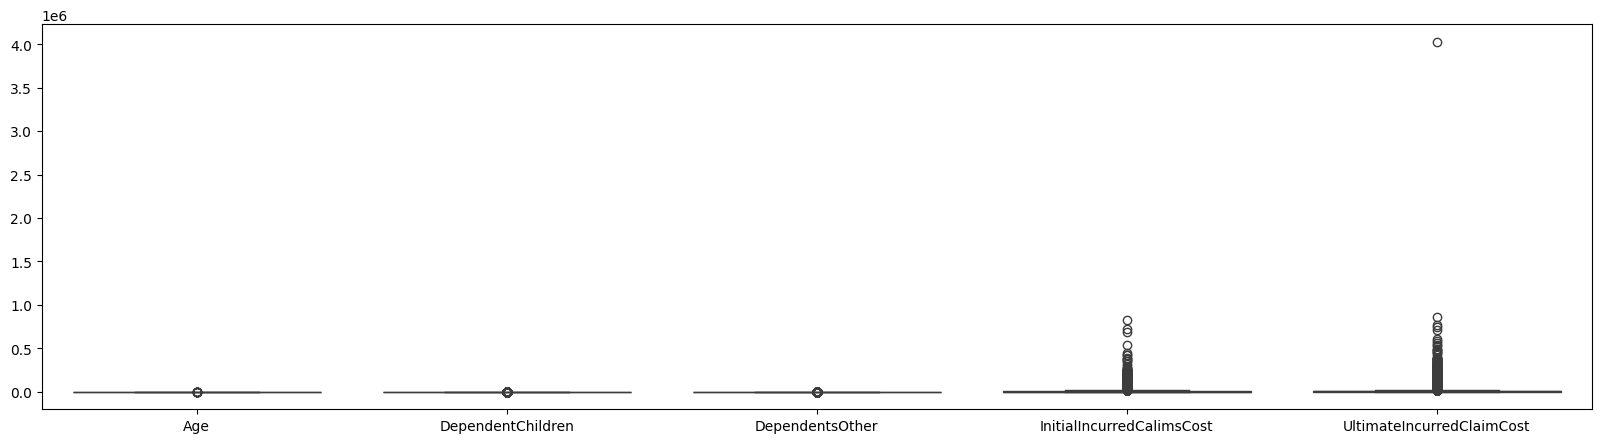

In [100]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_drop)

In [101]:
df_drop.shape

(36176, 12)

##### From the above boxplot we can see that there are a lot of outliers in "InitialIncurredCalimsCost" and "UltimateIncurredClaimCost".

In [102]:
for i in range(4):

    limit1=3*df_drop['InitialIncurredCalimsCost'].std()

    lower_limit1=df_drop['InitialIncurredCalimsCost'].mean()-limit1
    upper_limit1=df_drop['InitialIncurredCalimsCost'].mean()+limit1

    df_drop=df_drop[(df_drop['InitialIncurredCalimsCost']>lower_limit1)&(df_drop['InitialIncurredCalimsCost']<upper_limit1)]

    limit2=3*df_drop['UltimateIncurredClaimCost'].std()

    lower_limit2=df_drop['UltimateIncurredClaimCost'].mean()-limit2
    upper_limit2=df_drop['UltimateIncurredClaimCost'].mean()+limit2

    df_drop=df_drop[(df_drop['UltimateIncurredClaimCost']>lower_limit2)&(df_drop['UltimateIncurredClaimCost']<upper_limit2)]

<Axes: >

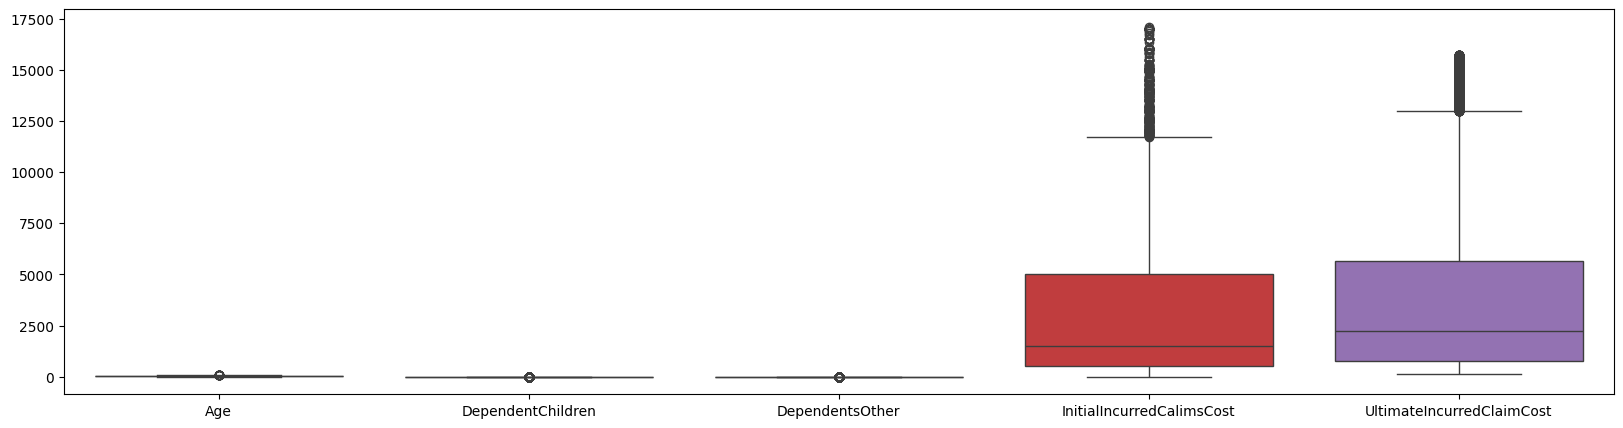

In [103]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_drop)

## Machine Learning Model

### Linear Regression Model

##### Importing the libraries for the modeling.

In [104]:
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as pre
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=pre.LabelEncoder()
from sklearn.metrics import r2_score

In [105]:
for x in df.select_dtypes(include='object').columns:
    df[x]=le.fit_transform(df[x])

In [106]:
X_scale=df_drop.drop(['UltimateIncurredClaimCost'],axis='columns')
cat_df=X_scale.select_dtypes(exclude=[float,int]).columns
for i in cat_df :
    X_scale[str(i)]=le.fit_transform(X_scale[str(i)])
X_scale=X_scale.apply(pre.minmax_scale)
Y=df_drop['UltimateIncurredClaimCost']

In [107]:
#Splitting the data into test and train data
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.3,random_state=1234456)

In [108]:
#checking the shape of the test and train set
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((21375, 11), (9162, 11), (21375,), (9162,))

In [109]:
import sklearn.linear_model as lm

In [110]:
#creating the linear regression model
glm=lm.LinearRegression()

In [111]:
#Fitting the model
glm.fit(x_train,y_train)

LinearRegression()

In [112]:
#Checking the test score
glm.score(x_test,y_test)

0.6891054728885728

In [113]:
#Checking the train score
glm.score(x_train,y_train)

0.675191214420686

In [114]:
# Checking the R square value
print ("R^2 is: \n", glm.score(x_test, y_test))

R^2 is: 
 0.6891054728885728


In [115]:
#Predictions on the test data set.
y_pred = glm.predict(x_test)

In [144]:
# Checking the RMSE score
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE first
mse = mean_squared_error(y_test, y_pred)

# Then calculate RMSE from MSE
rmse = np.sqrt(mse)

print('RMSE is: \n', rmse)

RMSE is: 
 1907.5440423880095


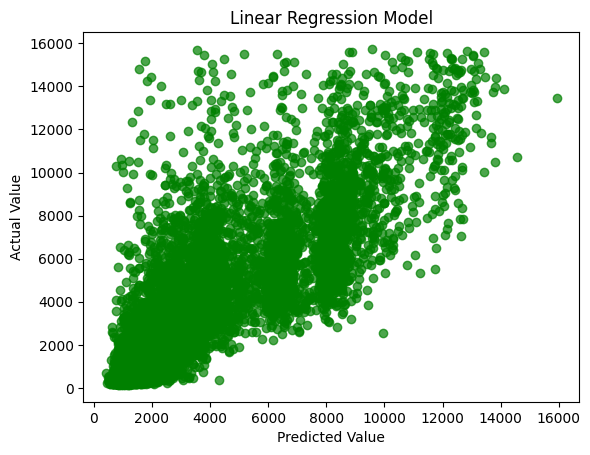

In [145]:
#Plotting the scatter plot between the predicted value and the actual values
actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=.7,
            color='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model')
plt.show()

### Decision tree regressor

In [117]:
#Importing the decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [118]:
# creating the model
dt= DecisionTreeRegressor()

In [119]:
#Fitting the data
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [120]:
# predicting the test set results
y_pred1= dt.predict(x_test)

In [121]:
# Calculating the r2 score
print ("R^2 is: \n", dt.score(x_test, y_test))

R^2 is: 
 0.5055146743192631


In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import joblib
import sklearn.preprocessing as pre
from sklearn.preprocessing import LabelEncoder

# Assuming you have already loaded and preprocessed your data into 'df_drop'
# as shown in your previous code

# 1. Data Preparation
# Select features (X) and target (y)
X = df_drop.drop(['UltimateIncurredClaimCost'], axis='columns')
y = df_drop['UltimateIncurredClaimCost']

# Apply Label Encoding to categorical columns in the training data if any
le = LabelEncoder()
for x in X.select_dtypes(include='object').columns:
    X[x] = le.fit_transform(X[x])

#Data scaling
X_scale=X.apply(pre.minmax_scale)

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=1234456)


# 3. Model Training
dt = DecisionTreeRegressor()  # Create a DecisionTreeRegressor model
dt.fit(X_train, y_train)      # Train the model with training data



# 4. Model Saving
joblib.dump(dt, 'decision_tree_model.pkl')
print("Model saved as decision_tree_model.pkl")

Model saved as decision_tree_model.pkl


In [146]:
#Checking the RMSE value
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE first
mse = mean_squared_error(y_test, y_pred1)

# Then calculate RMSE from MSE
rmse = np.sqrt(mse)

print('RMSE is: \n', rmse)

RMSE is: 
 2405.7181209667515


### Random Forest Regressor

In [123]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [124]:
#checking the test score
rf.score(x_test,y_test)

0.7234694097067186

In [125]:
#Checking the train score
rf.score(x_train,y_train)

0.9503745742664778

In [126]:
#Checking the r2 score
print ("R^2 is: \n", rf.score(x_test, y_test))

R^2 is: 
 0.7234694097067186


In [147]:
#checking the predicted value
y_pred2= rf.predict(x_test)
# Calculate MSE
mse = mean_squared_error(y_test, y_pred2)
# Calculate RMSE from MSE
rmse = np.sqrt(mse)
print ('RMSE is: \n', rmse)

RMSE is: 
 1799.035055014493


### Working on Test Data

In [148]:
df1=pd.read_csv("Test.csv")

In [149]:
#Checking information on test data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                17824 non-null  object 
 1   DateTimeOfAccident         17824 non-null  object 
 2   DateReported               17824 non-null  object 
 3   Age                        17824 non-null  int64  
 4   Gender                     17824 non-null  object 
 5   MaritalStatus              17817 non-null  object 
 6   DependentChildren          17824 non-null  int64  
 7   DependentsOther            17824 non-null  int64  
 8   WeeklyWages                17824 non-null  float64
 9   PartTimeFullTime           17824 non-null  object 
 10  HoursWorkedPerWeek         17824 non-null  float64
 11  DaysWorkedPerWeek          17824 non-null  int64  
 12  ClaimDescription           17824 non-null  object 
 13  InitialIncurredCalimsCost  17824 non-null  int

In [150]:
 #checking the description of test data
df1.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost
count,17824.000000,17824.000000,17824.000000,17824.000000,17824.000000,17824.000000,1.782400e+04
mean,33.938117,0.114901,0.010772,416.177867,37.671636,4.905689,8.039140e+03
std,12.137019,0.501956,0.115541,258.188850,12.732846,0.562258,2.468988e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00
25%,24.000000,0.000000,0.000000,200.000000,38.000000,5.000000,7.000000e+02
50%,32.000000,0.000000,0.000000,390.000000,38.000000,5.000000,2.000000e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9.500000e+03
max,81.000000,6.000000,5.000000,7497.000000,638.000000,7.000000,2.000000e+06


In [151]:
#checking the test dataframe
df1.head(5)

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost
0,WC8476284,2002-04-19T16:00:00Z,2002-05-13T00:00:00Z,38,M,M,0,0,500.00,F,40.00,5,STRUCK VALVES ABRASIONS LEFT LEG LACERATED LEF...,1000
1,WC2445024,1989-09-26T08:00:00Z,1989-10-14T00:00:00Z,38,F,M,0,0,350.00,P,29.75,4,LIFTING PATIENT PAIN IN LOWER BACK LEG,3500
2,WC4566945,1994-05-02T13:00:00Z,1994-05-17T00:00:00Z,24,M,S,0,0,487.50,F,38.00,5,LIFTING BOXES LOWER BACK BACK INJURY,7500
3,WC9911299,2005-11-26T06:00:00Z,2006-01-07T00:00:00Z,21,M,S,0,0,431.62,F,40.00,5,STRUCK LADDER BRUISED RIGHT KNEE MUSCLE RIGHT,1000
4,WC9066190,2003-03-12T13:00:00Z,2003-04-10T00:00:00Z,32,M,M,3,0,480.50,F,38.00,5,FELL OFF LADDER FRACTURE RIGHT WRIST,111077


In [152]:
#Checking the shape of test data
df1.shape

(17824, 14)

In [153]:
#Checking for duplicate values
df1.duplicated().sum()

0

##### There are no duplicate values

In [154]:
#Checking for the null values
df1.isnull().sum()

,0
ClaimNumber,0
DateTimeOfAccident,0
DateReported,0
Age,0
Gender,0
MaritalStatus,7
DependentChildren,0
DependentsOther,0
WeeklyWages,0
PartTimeFullTime,0


In [155]:
#Missing Value Treatment using mode imputation
df1['MaritalStatus']=df1['MaritalStatus'].fillna(df1['MaritalStatus'].mode()[0])

In [156]:
#To verify if there are more missing values in the dataset
df1.isnull().sum()

,0
ClaimNumber,0
DateTimeOfAccident,0
DateReported,0
Age,0
Gender,0
MaritalStatus,0
DependentChildren,0
DependentsOther,0
WeeklyWages,0
PartTimeFullTime,0


##### There are no missing values.

### Data Transformation

##### Data Binning

In [157]:
df1['Age_Bin']=pd.cut(df1['Age'],bins=[1,25,50,80] , labels=['Young','Middle-Age','Old'])
df1['Age_Bin']

,Age_Bin
0,Middle-Age
1,Middle-Age
2,Young
3,Young
4,Middle-Age
...,...
17819,Middle-Age
17820,Young
17821,Young
17822,Young


In [158]:
df1['WeeklyWages_Bin']=pd.cut(df1['WeeklyWages'],bins=[0,1000,2000,4000,7000,8000] , labels=['Low','Below Average','Average Wage','Above Average','High'])
df1['WeeklyWages_Bin']

,WeeklyWages_Bin
0,Low
1,Low
2,Low
3,Low
4,Low
...,...
17819,Low
17820,Low
17821,Low
17822,Low


In [159]:
df1_drop=df1.drop(columns=['WeeklyWages', 'WeeklyWages_Bin','HoursWorkedPerWeek','DaysWorkedPerWeek','Age_Bin'])

In [160]:
df1_drop.head(5)

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,PartTimeFullTime,ClaimDescription,InitialIncurredCalimsCost
0,WC8476284,2002-04-19T16:00:00Z,2002-05-13T00:00:00Z,38,M,M,0,0,F,STRUCK VALVES ABRASIONS LEFT LEG LACERATED LEF...,1000
1,WC2445024,1989-09-26T08:00:00Z,1989-10-14T00:00:00Z,38,F,M,0,0,P,LIFTING PATIENT PAIN IN LOWER BACK LEG,3500
2,WC4566945,1994-05-02T13:00:00Z,1994-05-17T00:00:00Z,24,M,S,0,0,F,LIFTING BOXES LOWER BACK BACK INJURY,7500
3,WC9911299,2005-11-26T06:00:00Z,2006-01-07T00:00:00Z,21,M,S,0,0,F,STRUCK LADDER BRUISED RIGHT KNEE MUSCLE RIGHT,1000
4,WC9066190,2003-03-12T13:00:00Z,2003-04-10T00:00:00Z,32,M,M,3,0,F,FELL OFF LADDER FRACTURE RIGHT WRIST,111077


In [161]:
df_drop.head(5)

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,PartTimeFullTime,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,F,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,F,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,F,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
5,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0.0,F,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925
6,WC6842268,1999-06-21T11:00:00Z,1999-09-09T00:00:00Z,50,M,M,0,0.0,F,STRUCK HEAD ON HEAD LACERATED HEAD,500,598.762315


In [162]:
df1_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17824 entries, 0 to 17823
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ClaimNumber                17824 non-null  object
 1   DateTimeOfAccident         17824 non-null  object
 2   DateReported               17824 non-null  object
 3   Age                        17824 non-null  int64 
 4   Gender                     17824 non-null  object
 5   MaritalStatus              17824 non-null  object
 6   DependentChildren          17824 non-null  int64 
 7   DependentsOther            17824 non-null  int64 
 8   PartTimeFullTime           17824 non-null  object
 9   ClaimDescription           17824 non-null  object
 10  InitialIncurredCalimsCost  17824 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.5+ MB


In [163]:
label_encoder=pre.LabelEncoder()
df1_drop['ClaimNumber']=label_encoder.fit_transform(df1_drop['ClaimNumber'])
df1_drop['DateTimeOfAccident']=label_encoder.fit_transform(df1_drop['DateTimeOfAccident'])
df1_drop['DateReported']=label_encoder.fit_transform(df1_drop['DateReported'])
df1_drop['Age']=label_encoder.fit_transform(df1_drop['Age'])
df1_drop['MaritalStatus']=label_encoder.fit_transform(df1_drop['MaritalStatus'])
df1_drop['PartTimeFullTime']=label_encoder.fit_transform(df1_drop['PartTimeFullTime'])
df1_drop['ClaimDescription']=label_encoder.fit_transform(df1_drop['ClaimDescription'])

In [164]:
df1_drop.dtypes

,0
ClaimNumber,int64
DateTimeOfAccident,int64
DateReported,int64
Age,int64
Gender,object
MaritalStatus,int64
DependentChildren,int64
DependentsOther,int64
PartTimeFullTime,int64
ClaimDescription,int64


In [184]:
def test_pre(data):
    import sklearn.preprocessing as pre
    from sklearn.preprocessing import minmax_scale
    label_encoder=pre.LabelEncoder()
    data=data.apply(minmax_scale)
    data['Age']=label_encoder.fit_transform(data['Age'])
    data['MaritalStatus']=label_encoder.fit_transform(data['MaritalStatus'])
    data['ClaimDescription']=label_encoder.fit_transform(data['ClaimDescription'])
    return data

In [185]:
def test_pre(data):
    import sklearn.preprocessing as pre
    from sklearn.preprocessing import minmax_scale
    #label_encoder=pre.LabelEncoder()
    # Convert all columns to numeric type if possible
    for col in data.columns:
        try:
            data[col] = pd.to_numeric(data[col])
        except ValueError:
            pass  # Skip columns that cannot be converted
    data=data.apply(minmax_scale)
    data['Age']=label_encoder.fit_transform(data['Age'])
    data['MaritalStatus']=label_encoder.fit_transform(data['MaritalStatus'])
    data['ClaimDescription']=label_encoder.fit_transform(data['ClaimDescription'])
    return data

In [170]:
# Assuming df1_drop is your preprocessed test data
test = df1_drop.copy()  # Create a copy of df1_drop to avoid modifying the original

# Apply Label Encoding to categorical columns in the test data
for column in test.select_dtypes(include=['object']).columns:
    test[column] = le.fit_transform(test[column])

# Now you can use 'test' in the prediction
y_pred = dt.predict(test)

In [171]:
y_pred

array([15597.29568 , 15597.29568 ,  9705.173401, ...,  9705.173401,
        9705.173401,  9705.173401])

In [172]:
result=y_pred

In [187]:
"""def submission(result):
    import pandas as pd
    import os
    file_path = "sample_submission.csv"

    # Check if the file exists in the current directory
    if not os.path.exists(file_path):
        from google.colab import files
        print(f"File '{file_path}' not found in the current directory.")
        print("Please upload the 'sample_submission.csv' file.")
        uploaded = files.upload()
        file_path = list(uploaded.keys())[0]

    submission = pd.read_csv(file_path)
    submission = submission.drop('UltimateIncurredClaimCost',axis=1)
    submission['UltimateIncurredClaimCost'] = result
    submission.to_csv("submit.csv",index=False)

submission(result)"""

'def submission(result):\n    import pandas as pd\n    import os\n    file_path = "sample_submission.csv"\n\n    # Check if the file exists in the current directory\n    if not os.path.exists(file_path):\n        from google.colab import files\n        print(f"File \'{file_path}\' not found in the current directory.")\n        print("Please upload the \'sample_submission.csv\' file.")\n        uploaded = files.upload()\n        file_path = list(uploaded.keys())[0]\n\n    submission = pd.read_csv(file_path)\n    submission = submission.drop(\'UltimateIncurredClaimCost\',axis=1)\n    submission[\'UltimateIncurredClaimCost\'] = result\n    submission.to_csv("submit.csv",index=False)\n\nsubmission(result)'

In [180]:
import joblib
model = joblib.load('decision_tree_model.pkl')  # Replace with your model file name

In [183]:
# Assuming df1_drop is your preprocessed test data
input_data = df1_drop.copy()  # Assign the test data to 'input_data'

# Apply Label Encoding to categorical columns in the test data
for column in input_data.select_dtypes(include=['object']).columns:
    input_data[column] = le.fit_transform(input_data[column])

# Now you can use 'input_data' in the prediction
predictions = model.predict(input_data)

In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Assuming df1_drop is your preprocessed test data and le is a LabelEncoder instance
input_data = df1_drop.copy()  # Create a copy to avoid modifying the original DataFrame

# Apply Label Encoding to categorical columns in the test data
for column in input_data.select_dtypes(include=['object']).columns:
    input_data[column] = le.fit_transform(input_data[column])

# Load the trained model
model = joblib.load('decision_tree_model.pkl')

# Function to get user input and make predictions
def predict_claim_cost():
    # Display label asking for ClaimNumber
    claim_number = input("Enter the ClaimNumber: ")

    # Find the row in input_data corresponding to the entered ClaimNumber
    row = input_data[input_data['ClaimNumber'] == claim_number]

    if row.empty:
        print("ClaimNumber not found in the dataset.")
    else:
        # Make prediction using the selected row
        prediction = model.predict(row)[0]
        print(f"Predicted UltimateIncurredClaimCost for ClaimNumber {claim_number}: {prediction}")

# Call the function to start the prediction process
predict_claim_cost()